# Car Acceptablity Testing

The "Car Acceptability Testing" module aims to evaluate and assess the suitability or acceptance of a car based on various predefined attributes or criteria. This module typically involves a set of rules or a predictive model that determines whether a given car configuration meets specific standards, making it suitable or acceptable for various purposes, such as personal use, resale, or commercial application.

## Understanding variables
1. **Buying_Price:** Category indicating the buying price range of the car (e.g., 'vhigh', 'high', 'med', 'low').
2. **Maintenance_Price:** Category representing the maintenance cost range of the car (e.g., 'vhigh', 'high', 'med', 'low').
3. **No_of_Doors:** Number of doors in the car (e.g., 2, 4).
4. **Person_Capacity:** Seating capacity of the car.
5. **Size_of_Luggage:** Size of the luggage space in the car ('small', 'med', 'big').
6. **Safety:** Safety rating or level of the car ('low', 'med', 'high').
7. **Car_Acceptability:** *(Target Variable)* Acceptability category of the car ('unacc' - unacceptable, 'acc' - acceptable, 'good', 'vgood' - very good)

## Import Libraries

In [1]:
# Import libraries. begin, let's import the necessary libraries that we'll be using throughout this notebook:

# Data Manipulation Libraries
import numpy as np 
import pandas as pd 

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# knowing the name of the dataset
import os
for dirname, _, filenames in os.walk('..\dataset\car_acceptability.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Load tha data.
df = pd.read_csv("..\dataset\car_acceptability.csv")
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Exploratory Data Analysis

In [4]:
# Seeing the shape of the data.
df.shape

(1728, 7)

In [5]:
# Seeing if there are dublicated.
df.duplicated().sum()

0

In [6]:
# seeing if there are null values.
df.isna().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [7]:
# Seeing information about data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df.columns

Index(['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
       'Size_of_Luggage', 'Safety', 'Car_Acceptability'],
      dtype='object')

In [9]:
categorical_features = ['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
                        'Size_of_Luggage', 'Safety', 'Car_Acceptability']

for i in categorical_features:
    print(df[i].value_counts())
    print('-' * 50)

vhigh    432
high     432
med      432
low      432
Name: Buying_Price, dtype: int64
--------------------------------------------------
vhigh    432
high     432
med      432
low      432
Name: Maintenance_Price, dtype: int64
--------------------------------------------------
2        432
3        432
4        432
5more    432
Name: No_of_Doors, dtype: int64
--------------------------------------------------
2       576
4       576
more    576
Name: Person_Capacity, dtype: int64
--------------------------------------------------
small    576
med      576
big      576
Name: Size_of_Luggage, dtype: int64
--------------------------------------------------
low     576
med     576
high    576
Name: Safety, dtype: int64
--------------------------------------------------
unacc    1210
acc       384
good       69
vgood      65
Name: Car_Acceptability, dtype: int64
--------------------------------------------------


### Data Visualization

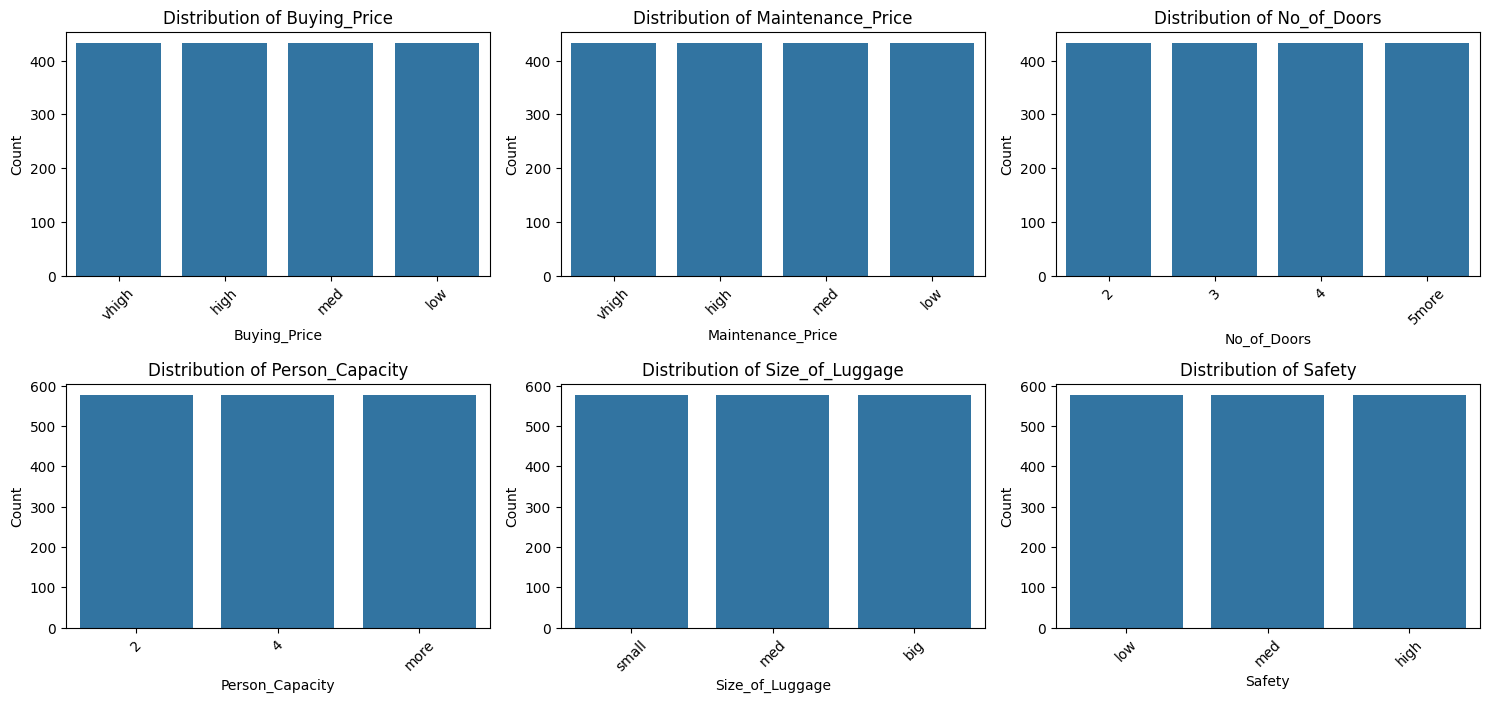

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame is assumed to be named 'df'
plt.figure(figsize=(15, 10))

# Plotting count plots for each categorical column
for i, column in enumerate(df.columns[:-1]):  # Excluding the target variable
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.tight_layout()
plt.show()

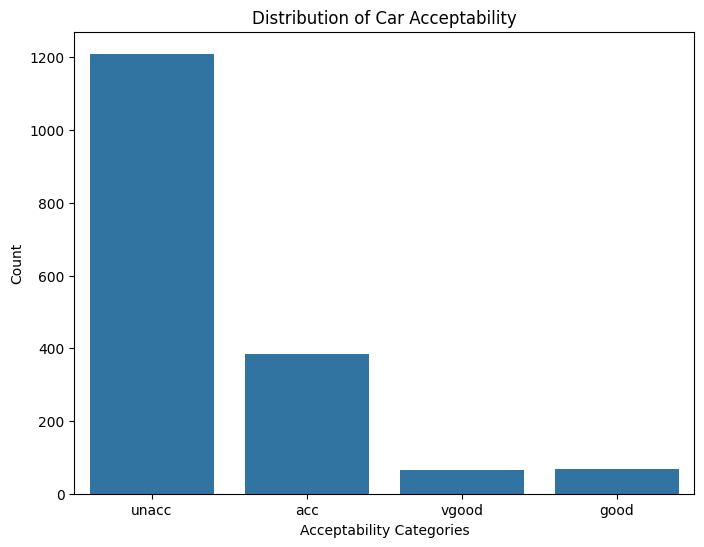

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Car_Acceptability')
plt.title('Distribution of Car Acceptability')
plt.xlabel('Acceptability Categories')
plt.ylabel('Count')

plt.show()

## Feature Engineering

In [12]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Initialize encoders
ordinal_enc = OrdinalEncoder()
one_hot_enc = OneHotEncoder(drop='first')  # Drop first column to avoid multicollinearity
label_enc = LabelEncoder()

# Example: Ordinal Encoding for 'Buying_Price' and 'Maintenance_Price' columns
df['Buying_Price_Encoded'] = ordinal_enc.fit_transform(df[['Buying_Price']])
df['Maintenance_Price_Encoded'] = ordinal_enc.fit_transform(df[['Maintenance_Price']])

# Example: One-Hot Encoding for 'Size_of_Luggage' and 'Safety' columns
one_hot_encoded = one_hot_enc.fit_transform(df[['Size_of_Luggage', 'Safety']]).toarray()
one_hot_columns = one_hot_enc.get_feature_names_out(['Size_of_Luggage', 'Safety'])
df[one_hot_columns] = one_hot_encoded

# Example: Label Encoding for the target variable 'Car_Acceptability'
df['Car_Acceptability_Encoded'] = label_enc.fit_transform(df['Car_Acceptability'])

# Mapping categorical values to numeric values for 'No_of_Doors'
door_mapping = {'2': 2, '3': 3, '4': 4, '5more': 5}
df['No_of_Doors_Numeric'] = df['No_of_Doors'].map(door_mapping)

# Mapping categorical values to numeric values for 'Person_Capacity'
person_mapping = {'2': 2, '4': 4, 'more': 6}  # Assuming 'more' refers to more than 4
df['Person_Capacity_Numeric'] = df['Person_Capacity'].map(person_mapping)

# Drop the original categorical columns
df.drop(['Buying_Price', 'Maintenance_Price', 'Size_of_Luggage', 'Safety', 'Car_Acceptability', 'No_of_Doors', 'Person_Capacity'], axis=1, inplace=True)

In [13]:
# Print the encoded values for 'Car_Acceptability'
encoded_classes = label_enc.classes_
encoded_values = label_enc.transform(encoded_classes)

for cls, val in zip(encoded_classes, encoded_values):
    print(f"Class: {cls} -> Encoded Value: {val}")

Class: acc -> Encoded Value: 0
Class: good -> Encoded Value: 1
Class: unacc -> Encoded Value: 2
Class: vgood -> Encoded Value: 3


In [14]:
df.head()

,Buying_Price_Encoded,Maintenance_Price_Encoded,Size_of_Luggage_med,Size_of_Luggage_small,Safety_low,Safety_med,Car_Acceptability_Encoded,No_of_Doors_Numeric,Person_Capacity_Numeric
0,3.0,3.0,0.0,1.0,1.0,0.0,2,2,2
1,3.0,3.0,0.0,1.0,0.0,1.0,2,2,2
2,3.0,3.0,0.0,1.0,0.0,0.0,2,2,2
3,3.0,3.0,1.0,0.0,1.0,0.0,2,2,2
4,3.0,3.0,1.0,0.0,0.0,1.0,2,2,2


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' contains your preprocessed DataFrame with features and target variable

# Splitting the data into features and target variable
X = df.drop('Car_Acceptability_Encoded', axis=1)  # Features
y = df['Car_Acceptability_Encoded']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [16]:
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9653
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        83
           1       0.56      0.91      0.69        11
           2       0.99      1.00      1.00       235
           3       0.94      0.94      0.94        17

    accuracy                           0.97       346
   macro avg       0.87      0.93      0.89       346
weighted avg       0.97      0.97      0.97       346



In [17]:
# Define a list of models to evaluate
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [18]:
from sklearn.model_selection import cross_val_predict

# Iterate over each model and evaluate its accuracy using cross-validation.
for model in models:
    # Perform cross-validation and get predictions
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
    
    # Print the mean accuracy score for the current model
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}")

    # Print the classification report for the current model
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_train, y_pred_cv, zero_division=1))
    print("\n")

LogisticRegression: Mean Accuracy = 0.7727776905770941
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       301
           1       1.00      0.00      0.00        58
           2       0.85      0.91      0.88       975
           3       0.00      0.00      1.00        48

    accuracy                           0.77      1382
   macro avg       0.60      0.38      0.61      1382
weighted avg       0.76      0.77      0.78      1382



DecisionTreeClassifier: Mean Accuracy = 0.9797389211531419
DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       301
           1       0.95      0.90      0.92        58
           2       1.00      0.99      0.99       975
           3       0.94      0.92      0.93        48

    accuracy                           0.98      1382
   macro avg       0.96      0.94  

In [19]:
# Make tha random forest model with specific best hyperparameters.
model = DecisionTreeClassifier()

# Fit the model.
model.fit(X_train, y_train)

# Predict y-predict.
y_pred = model.predict(X_test)

# Evaluate the accuracy of y-predict.
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.968


In [20]:
import joblib

# Assuming 'model' is your trained DecisionTreeClassifier
joblib.dump(model, '../models/car_accept.joblib')

['../models/car_accept.joblib']

## Feature Importance

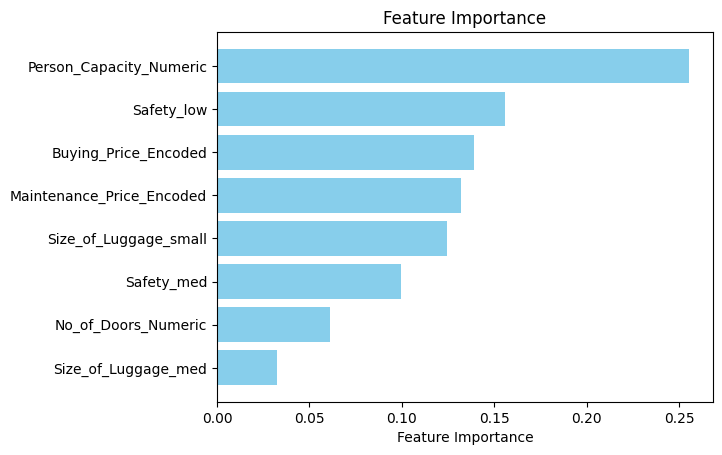

In [21]:
# Get feature importances
feature_importance = model.feature_importances_

# Sort feature importance indices
sorted_idx = np.argsort(feature_importance)

# Retrieve feature names
features = X.columns

# Plot feature importance
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()